<a href="https://colab.research.google.com/github/lrssv/TimeSeriesForecastingCOVID19/blob/master/ARIMA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install statsmodels==0.11.0rc1

     |████████████████████████████████| 8.7MB 2.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#reading the dataset
url = '/content/drive/My Drive/who dataset/up_dataset_who.csv'

series = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)
series.shape


(115,)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1166.486
Date:                Wed, 20 May 2020   AIC                           2344.971
Time:                        17:04:43   BIC                           2361.388
Sample:                    01-11-2020   HQIC                          2351.634
                         - 05-04-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3729      0.059     -6.362      0.000      -0.488      -0.258
ar.L2         -0.2947      0.074     -3.989      0.000      -0.440      -0.150
ar.L3         -0.0762      0.083     -0.919      0.3

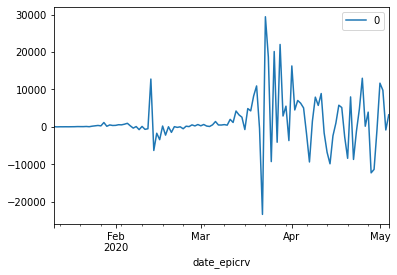

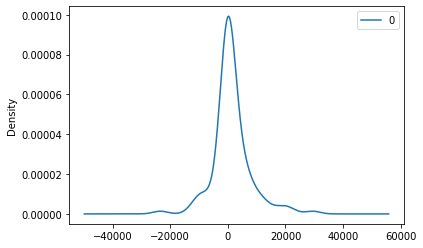

                  0
count    115.000000
mean    1365.201054
std     6575.093954
min   -23429.875710
25%     -405.486318
50%      222.904259
75%     3030.285112
max    29410.841247


In [4]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=18647.594767, expected=54655.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=53290.172753, expected=41366.000000
predicted=35239.090679, expected=62724.000000
predicted=70334.111362, expected=62705.000000
predicted=40351.578632, expected=59160.000000
predicted=74864.368883, expected=57643.000000
predicted=58300.232065, expected=72471.000000
predicted=70679.420682, expected=72901.000000
predicted=66473.344677, expected=75944.000000
predicted=74999.081651, expected=79908.000000
predicted=79825.994170, expected=80692.000000
predicted=84436.365083, expected=77617.000000
predicted=80391.784704, expected=68465.000000
predicted=75855.776531, expected=73849.000000
predicted=74628.838801, expected=82736.000000
predicted=74942.130291, expected=84635.000000
predicted=79228.194488, expected=90778.000000
predicted=86874.404567, expected=84634.000000
predicted=88499.010512, expected=77274.000000
predicted=85203.988033, expected=71545.000000
predicted=76414.500364, expected=73220.000000
predicted=74372.408961, expected=76794.000000
predicted=73017.177117, expected=8

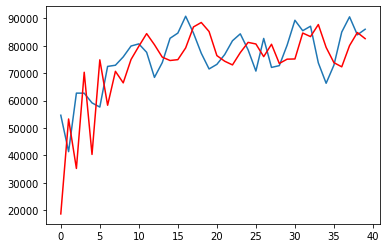

In [5]:
X = [float(v) for v in series.values]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()